## Import Libraries

In [2]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

## About the Dataset

Link: 'http://archive.ics.uci.edu/ml/machine-learning-databases/20newsgroups-mld/20_newsgroups.tar.gz '
Download the datset here.

About the dataset: 'http://archive.ics.uci.edu/ml/machine-learning-databases/20newsgroups-mld/20newsgroups.data.html'

# Read the text documents

Idea: Prepare dataframe containing address of each file under that label.

In [3]:
#Specify the path of the folder containing data in your system
data_folder_path='/20_newsgroups'

#These are all the subdirectories inside the data folder
label_list=os.listdir(data_folder_path)
print(label_list)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
#This dataframe will contain paths of all the files
all_files=pd.DataFrame(columns=['Path','Label'])

for label in label_list:
    
    #Go inside the data_folder and then inside this label_folder
    curr_path=os.path.join(data_folder_path,label)
    
    #These are the file names under this category
    file_names=os.listdir(curr_path)
    
    for file_name in file_names:
        
        #For every file ,this is it's complete path
        complete_file_path=os.path.join(curr_path,file_name)
        
        #add to our data frame
        all_files.loc[len(all_files)]=[complete_file_path,label]
    
all_files.head()

,Path,Label
0,/20_newsgroups\alt.atheism\49960,alt.atheism
1,/20_newsgroups\alt.atheism\51060,alt.atheism
2,/20_newsgroups\alt.atheism\51119,alt.atheism
3,/20_newsgroups\alt.atheism\51120,alt.atheism
4,/20_newsgroups\alt.atheism\51121,alt.atheism


In [5]:
print("All possible data points available to you are: ",len(all_files))

All possible data points available to you are:  19997


In [6]:
#Split these data point in training and testing
train_paths,test_paths,train_labels,test_labels=train_test_split(all_files['Path'].copy(),all_files['Label'].copy(),random_state=1)
print(train_paths.shape,train_labels.shape)
print(test_paths.shape,test_labels.shape)

(14997,) (14997,)
(5000,) (5000,)


## Create a vocabulary using only the training data

Creating a vocabulary is one of the most important part of this project.

### Problem Faced:
We wish to include only those words in our vocaulary that will be helpfull to us.
Considering every word will result in poor accuracy of the model since most of the words are redundant.

In the first trial of the model except for the stop words, I included numeric, alphanumeric and a lot more redundant words.
This led to poor model. 

Subsequently, to rectify this, I considered words with lenght>=3 which contained only alphabets.

In [7]:
#Create a stop words dictionary
#This file has been picked up from Kaggle

stop_words=set()

stop_words_path='englishST.txt'

with open(stop_words_path) as file_obj:
    file_data=file_obj.readlines() 
    #return every line as a string
    for line in file_data:
        line=line.strip()
        words_in_line=line.split()
        for stop_word in words_in_line:
            stop_words.add(stop_word)


In [8]:
#A dictionary to store frequency on all relevant words
word_freq={}

#Iterate ove every training text and add relevant words to dictionary
for path in train_paths:
    
    #Open the file and start reading
    with open(path) as file_obj:
        
        file_data=file_obj.readlines() 
        #reads every line as a string
        
        for line in file_data:
            
            line=line.strip('\n') 
            
            line=line.lower()
            #Consider only lower case words
            
            words_in_line=line.split() 
            #splits the string with ' ' as delimeter
            
            for word in words_in_line:
                
                word=word.strip()
                #We need to remove any trailing spaces
                
                if (word.isalpha()) and (word not in stop_words) and (len(word)>=3):
                    #(contains only alphabets & is not a stop word & length>=3)
                    
                    #print(word,end=' ')
                    freq=word_freq.get(word,0)
                    word_freq[word]=freq+1
                
            

In [9]:
print("Length of word_freq dictionary= ",len(word_freq))
#Total number of words in your dictionary

Length of word_freq dictionary=  60538


In [10]:
#Sort the dictionary in decreasing order of frequencies
word_freq=dict(sorted(word_freq.items(), key=lambda item: item[1],reverse=True))

words=[]
freq=[]

for w,f in word_freq.items():
    #print(w,len(w))
    words.append(w)
    freq.append(f)
    

In [11]:
#Let us see what words we have obtained in the dictionary
for i in range(len(words)):
    print(words[i],freq[i],end='  ')

apr 14692  gmt 13264  article 9070  people 6361  university 6156  good 3922  make 3659  time 3298  world 2718  find 2370  computer 2353  system 2263  news 2182  god 2180  back 2147  state 2091  work 2011  government 1924  made 1908  problem 1894  information 1875  usa 1872  number 1868  read 1838  things 1793  part 1732  windows 1715  give 1695  point 1690  data 1635  put 1619  question 1607  years 1585  space 1534  long 1531  set 1526  public 1526  file 1464  power 1463  program 1438  software 1427  run 1423  thing 1401  lot 1386  support 1377  case 1353  hard 1349  science 1341  fact 1339  drive 1327  called 1316  call 1301  great 1289  found 1285  real 1268  law 1219  send 1208  group 1192  research 1191  heard 1168  message 1166  year 1164  bit 1142  key 1142  free 1137  car 1133  national 1132  access 1117  reason 1116  systems 1109  human 1109  thought 1083  post 1079  person 1079  jesus 1079  list 1074  kind 1071  means 1071  end 1053  game 1050  big 1050  high 1039  makes 1037 

noticed 253  disease 253  spend 253  thousands 252  organization 252  admit 252  clock 251  hands 251  soldiers 251  percent 251  font 251  prefer 251  armed 251  virginia 251  european 250  statements 250  articles 250  posts 250  murder 249  arguments 249  evil 249  basically 249  programming 249  fully 249  foreign 248  closed 248  shown 248  notice 248  hot 248  patients 248  mother 247  street 247  branch 246  selling 246  areas 245  developed 245  radar 245  costs 245  mountain 244  woman 244  moon 244  keeping 244  popular 244  professor 244  switch 244  treatment 244  express 244  energy 243  escrow 243  smith 243  throw 243  bmw 243  amendment 243  compared 243  quick 243  heart 243  references 243  picture 243  tend 242  claimed 242  friends 242  argue 242  knowing 241  define 241  failed 241  satellite 241  goal 241  recall 240  richard 240  facts 239  army 239  perfect 239  types 239  title 239  convert 239  risk 239  reality 238  nsa 238  supported 238  showed 237  transfe

village 135  motor 135  sunday 135  astronomy 135  commands 135  credit 135  clinical 135  remains 134  repeat 134  aspects 134  style 134  warning 134  authorities 134  unlike 134  boulder 134  organizations 134  berkeley 134  conditions 134  grand 134  hitting 134  session 134  documents 134  villages 134  charles 133  impact 133  demand 133  distance 133  montreal 133  professional 133  rangers 133  bay 133  discussions 133  notion 133  detector 133  enter 133  obtained 133  cal 133  shooting 133  entries 133  agreement 133  translation 133  chemical 133  packages 133  technologies 133  pit 133  cache 133  officials 132  wearing 132  brake 132  meeting 132  scientists 132  lay 132  pens 132  success 132  shut 132  burn 132  chi 132  chosen 132  hiv 132  alive 131  adding 131  established 131  diet 131  followers 131  thousand 131  lying 131  reached 131  libertarian 131  seek 131  observed 131  printed 131  map 131  checking 131  probe 131  plenty 131  observations 130  interactive 

95  pasadena 95  ended 95  caps 95  daughter 95  penguins 95  douglas 95  ends 95  kent 95  dean 95  baby 95  flow 95  concerns 95  pieces 95  appeal 95  mental 95  roy 95  dick 95  suit 95  campaign 95  linked 95  perry 94  freely 94  implement 94  updated 94  contract 94  wonderful 94  continues 94  stream 94  smart 94  entitled 94  pop 94  converted 94  awful 94  randy 94  morals 94  subscribe 94  watched 94  plays 94  bound 94  largely 94  scheduled 94  severe 94  floor 94  bar 94  rape 94  salvation 94  ignorant 94  silver 93  pitch 93  rider 93  citizen 93  pure 93  abc 93  sentence 93  empty 93  dictionary 93  fits 93  correctly 93  permanent 93  vlb 93  suggestion 93  remind 93  element 93  dma 93  specs 93  massive 93  extent 93  combination 93  fat 93  bullock 93  glory 92  hebrew 92  edition 92  informed 92  min 92  stage 92  silly 92  nyc 92  corporate 92  executive 92  captain 92  bullet 92  dealers 92  contained 92  hide 92  cramer 92  idle 92  japan 92  approved 92  bobb

void 64  fred 64  confusing 64  samuel 64  occurred 64  maple 64  aluminum 64  saves 64  chuck 64  garage 64  rocks 64  obey 64  graphical 64  judas 64  iraqi 63  delivery 63  fresh 63  concentrate 63  abstract 63  teacher 63  maxtor 63  sternlight 63  sutherland 63  upgraded 63  relating 63  micro 63  documented 63  topics 63  mistakes 63  spy 63  germans 63  inherently 63  valve 63  aimed 63  interpretations 63  russians 63  jury 63  stayed 63  interpreted 63  personnel 63  identity 63  guidelines 63  preserve 63  injury 63  recorded 63  princeton 63  canucks 63  shame 63  courts 63  kick 63  sponsored 63  iraq 63  stations 63  pink 62  expression 62  ink 62  initiative 62  justified 62  mint 62  owns 62  pst 62  fancy 62  gift 62  prediction 62  devil 62  yankees 62  johns 62  mess 62  covers 62  discrimination 62  assumptions 62  ads 62  founding 62  complaining 62  feb 62  cast 62  spoken 62  todd 62  centuries 62  seats 62  honestly 62  render 62  conspiracy 62  socket 62  messia

46  permitted 46  needless 46  promiscuous 46  measurements 46  archie 46  administrator 46  partly 46  sufficiently 46  automated 46  locks 46  arbor 46  stomach 46  homicide 46  yellow 46  harvey 46  facing 46  accomplished 46  twelve 46  esdi 46  altitude 46  specification 46  pad 46  participated 46  utexas 46  sensor 46  abortions 46  administrative 46  ward 46  jumped 46  bmp 46  publications 46  deity 46  baerga 46  magellan 46  dsp 46  glenn 46  estimate 46  fuhr 46  reward 46  skills 46  corn 46  chromium 46  contrib 46  colours 45  declaration 45  shoulder 45  tons 45  presume 45  twin 45  firmly 45  theistic 45  trident 45  begun 45  explicit 45  neck 45  robin 45  sticking 45  origins 45  inclined 45  microwave 45  outputs 45  msdos 45  tonight 45  sas 45  sends 45  mixed 45  trigger 45  philosopher 45  oort 45  fatal 45  periods 45  dna 45  identification 45  theist 45  peak 45  enjoyed 45  corrected 45  lowest 45  felix 45  bare 45  jurisdiction 45  aclu 45  rkba 45  elec

36  compute 36  associates 36  constitutes 36  seals 36  compress 36  closing 36  conveniently 36  summarize 36  sinful 36  outright 36  diagnosis 36  pocket 36  accidents 36  upload 36  ucc 36  kendig 36  fait 36  madison 36  coprocessor 36  goverment 36  filters 36  sexually 36  panasonic 36  resort 36  rutgers 36  curtis 36  mirrors 36  steam 36  rebuild 36  tips 36  mandate 36  malaria 36  latin 36  gates 36  consortium 36  oscillator 36  horror 36  hartford 36  ammunition 36  soldier 36  insure 36  pads 36  commander 36  gut 36  swear 36  slaughtered 36  pagan 36  lifting 36  courier 36  cesarean 36  survived 35  movements 35  adjusted 35  journalists 35  sydney 35  structures 35  demonstrates 35  announcing 35  sheep 35  breton 35  docs 35  raises 35  relativity 35  cartridges 35  laserjet 35  stacker 35  deciding 35  yugoslavia 35  acknowledged 35  palo 35  abused 35  oriental 35  appearing 35  seeks 35  uncle 35  shield 35  hayes 35  protocols 35  unauthorized 35  demanding 35 

 30  counts 30  brave 30  declined 30  favour 30  disclosure 30  nist 30  ruth 30  hitters 30  octopus 30  slap 30  miscellaneous 30  encrypting 30  seldom 30  fears 30  veterans 30  consequence 30  quack 30  releasing 30  allegations 30  divide 30  partner 30  charity 30  blocked 30  varies 30  banning 30  translations 30  excel 30  troop 30  incoming 30  savings 30  guest 30  bumper 30  precious 30  barlow 30  certainty 30  bars 30  torn 30  requesting 30  inspection 30  goodness 30  apostle 30  hendricks 30  uranium 30  someday 30  pride 30  bohr 30  anon 30  extraordinary 30  pose 30  moderator 30  federalist 30  slightest 30  privately 30  nut 30  kiefer 30  row 30  mvp 30  allergy 30  publishes 30  sandberg 30  starters 30  heavier 30  willingness 30  inevitable 30  lafontaine 30  conducting 30  prevalence 30  faculty 30  breath 30  palace 30  ciphers 30  prospect 30  moslems 30  activists 30  diagnostic 30  identifying 30  reproduction 30  overview 30  denis 30  gregg 30  bnr 30

proportion 26  ether 26  permanently 26  volunteers 26  adequately 26  ratings 26  hood 26  seed 26  casualties 26  tipped 26  khomeini 26  fatwa 26  lamp 26  rip 26  vaccines 26  failures 26  dalhousie 26  cabinet 26  ptr 26  thick 26  cirrus 26  posed 26  earliest 26  manages 26  unified 26  diagrams 26  extremist 26  warsaw 26  walla 26  odometer 26  traveling 26  emit 26  callback 26  jamie 26  chemists 26  xwd 26  champion 26  installations 26  rescue 26  emulator 26  fredericton 26  calcium 26  flea 26  dragged 26  radiosity 26  resume 26  rll 26  istanbul 25  lankford 25  waving 25  shake 25  transistor 25  coding 25  billboard 25  lowell 25  belonging 25  publically 25  kim 25  olympic 25  concludes 25  chapters 25  threats 25  babe 25  eddie 25  starter 25  atal 25  pregnency 25  keyseach 25  tension 25  microcircuits 25  unbreakable 25  lynn 25  hosts 25  revenge 25  tracks 25  yigal 25  confirmation 25  democrats 25  pentium 25  arcade 25  directions 25  annihilation 25  stu

  transformation 21  diesels 21  revelations 21  ruff 21  resize 21  behanna 21  arromdee 21  gil 21  camry 21  unprovoked 21  concussion 21  prophetic 21  entryway 21  handing 21  cdi 21  halifax 21  crossroads 21  aided 21  metropolitan 21  hail 21  guerillas 21  ndw 21  gurvitz 21  dops 21  reston 21  bolshevik 21  colonial 20  terror 20  whiten 20  shai 20  repentance 20  pihko 20  consist 20  billboards 20  realizing 20  introducing 20  carpet 20  pending 20  testify 20  placement 20  warnings 20  cabletron 20  pains 20  darn 20  possesion 20  billy 20  parked 20  omega 20  punisher 20  mips 20  irony 20  cracking 20  actix 20  rigorous 20  intercept 20  abiding 20  bolero 20  apartheid 20  prayed 20  unborn 20  catching 20  roots 20  berg 20  specialist 20  progressive 20  elvis 20  uniforms 20  homer 20  patrol 20  rethinking 20  rethought 20  chatham 20  licence 20  juan 20  feared 20  simmons 20  thumbs 20  bore 20  limbaugh 20  proofs 20  transformer 20  camping 20  wedding 2

 17  perish 17  cattle 17  distinctly 17  appointment 17  credentials 17  arnold 17  waldrop 17  stud 17  valerie 17  rust 17  exp 17  instructional 17  winmarks 17  benchmarks 17  obeying 17  ment 17  speedo 17  casper 17  adjacent 17  incidence 17  reflections 17  reflection 17  fleeing 17  dialing 17  defensemen 17  macinnis 17  investor 17  sticky 17  mir 17  pogroms 17  macx 17  peculiar 17  instinctive 17  commenting 17  celp 17  geophysical 17  dundee 17  cie 17  preferences 17  metaphysical 17  marquette 17  emerging 17  sickened 17  exiting 17  disgusting 17  sadly 17  socialism 17  correspondence 17  negotiation 17  liek 17  belts 17  resistors 17  sceptical 17  convict 17  summarizes 17  dressed 17  crater 17  projections 17  ppm 17  attackers 17  conclusive 17  carol 17  intercepts 17  peacefully 17  cpp 17  wichita 17  perceptions 17  shotguns 17  concurrent 17  reaches 17  shalala 17  adverse 17  traps 17  wit 17  permitting 17  underneath 17  datadesk 17  sunsoft 17  dou

cups 15  villager 15  punched 15  zoroastrians 15  genoa 15  owes 15  spiderman 15  superman 15  bestiality 15  someplace 15  hga 15  nea 15  memphis 15  madden 15  zenith 15  kelbajar 15  tort 15  clv 15  khmer 15  sigkids 15  deliveries 15  conjugate 15  shagen 15  vinyl 15  schismatic 15  decenso 15  tomlin 15  interleave 15  debates 14  devote 14  sans 14  jackets 14  dang 14  windowed 14  halves 14  rosereader 14  finishing 14  algorythm 14  happier 14  influential 14  asala 14  bunning 14  bennett 14  megabyte 14  rollers 14  grotesquely 14  encore 14  restaurants 14  warrior 14  stamped 14  liefeld 14  geoffrey 14  illustrator 14  cone 14  monkey 14  gadgets 14  doubles 14  briefed 14  intrepid 14  commits 14  wfan 14  drexel 14  relieve 14  olde 14  haters 14  freeway 14  pigs 14  stanza 14  depressed 14  farming 14  sacrafice 14  awhile 14  needles 14  mitsumi 14  receivers 14  gunshot 14  resolving 14  mythology 14  letterman 14  bitter 14  sabr 14  whilst 14  smiley 14  pls 

mayhew 12  neoucom 12  disinterested 12  justifying 12  unisys 12  template 12  tangible 12  mcfarlane 12  sabretooth 12  bagged 12  advertisement 12  tamper 12  amir 12  corolla 12  diablo 12  shining 12  marlborough 12  psi 12  reposting 12  retinal 12  cyberspace 12  ensures 12  preserves 12  unrecognized 12  constitutions 12  mouths 12  recurring 12  proverbial 12  fanatical 12  godless 12  npr 12  waterbed 12  altima 12  propagation 12  damnation 12  breathe 12  rained 12  sebastian 12  pgh 12  ridiculed 12  poke 12  revoke 12  clippers 12  coated 12  reminder 12  chad 12  wrecking 12  akademi 12  inaccuracies 12  rampant 12  lange 12  cuz 12  happend 12  netnews 12  conjoined 12  commercials 12  locating 12  nabil 12  handlebars 12  mentor 12  portray 12  perl 12  outgoing 12  withhold 12  authenticity 12  alluded 12  cloak 12  unsubstantiated 12  devised 12  trivially 12  extras 12  stabbing 12  speculating 12  shootings 12  jkn 12  astronautics 12  wallpaper 12  manufactures 12

11  notepad 11  fenway 11  sheppard 11  howe 11  packaging 11  escalation 11  dietz 11  plagued 11  alleviate 11  stool 11  esoteric 11  oddly 11  prevalent 11  guided 11  knowlege 11  pressures 11  alright 11  smashing 11  consecration 11  heretical 11  annals 11  snake 11  penetrate 11  handwriting 11  spine 11  spinal 11  shaping 11  peterborough 11  murderous 11  replica 11  deepest 11  gleaned 11  ludwig 11  khmylev 11  smehlik 11  sandstrom 11  fedorov 11  maclean 11  delaying 11  southeast 11  onboard 11  coil 11  clicks 11  config 11  antennas 11  colonel 11  rubbing 11  newtout 11  gritz 11  avetis 11  locals 11  projectile 11  substitution 11  apocalypse 11  splinter 11  dictator 11  fri 11  flipping 11  tags 11  barbarism 11  deceive 11  smear 11  bark 11  lezard 11  stereotype 11  pixar 11  corona 11  overlapping 11  annoyance 11  cabling 11  inexperienced 11  labelled 11  globally 11  vizquel 11  coating 11  secretive 11  disarmed 11  specialty 11  soak 11  mufti 11  statm

 10  qazi 10  supplements 10  ripken 10  sauce 10  rap 10  krumins 10  cambodia 10  grabber 10  doubting 10  rouge 10  wch 10  backdoor 10  receptacles 10  threaded 10  smugly 10  cryptanalyst 10  borderland 10  nakhitchevan 10  dotted 10  mournful 10  pict 10  pius 10  mattias 10  broadway 10  jeopardy 10  cty 10  chmos 10  importation 10  enabling 10  citibank 10  adaptive 10  num 10  kamloops 10  vika 10  shos 10  hyperhelp 10  bidirectional 9  salonica 9  jewry 9  hander 9  sundays 9  hsu 9  recipients 9  nitrogen 9  reynolds 9  conversions 9  howland 9  hubcap 9  gallon 9  burger 9  vanilla 9  aptly 9  illustrations 9  wool 9  situated 9  brandon 9  selects 9  heinlein 9  ohmite 9  resistances 9  poem 9  bona 9  shutout 9  deskjets 9  accumulated 9  moto 9  immature 9  zterm 9  discrepancies 9  rooted 9  magnus 9  lobo 9  simpsons 9  dagger 9  constantine 9  teen 9  polypropylene 9  stairs 9  pernicious 9  profess 9  wavelength 9  absorbed 9  turtle 9  winmark 9  infringing 9  for

8  projector 8  datacomm 8  surroundings 8  travellers 8  prophesies 8  inescapable 8  leetch 8  doubters 8  detweiler 8  unsupported 8  evade 8  suicidal 8  temptation 8  kleinpaste 8  helsingius 8  provoke 8  flooding 8  loathe 8  adopting 8  gases 8  concealing 8  disturbed 8  withdrawn 8  mindlessly 8  strait 8  smuther 8  prod 8  acknowledging 8  aging 8  outfield 8  dispose 8  itchy 8  fumes 8  baffled 8  safeties 8  gastroenterology 8  talents 8  paperback 8  leius 8  rightfully 8  pledged 8  obtains 8  levi 8  predecessors 8  voluntarily 8  pacifists 8  elaborated 8  chuq 8  esd 8  sfwa 8  otherrealms 8  biting 8  proportionately 8  divinely 8  tba 8  halls 8  blowout 8  authoritarian 8  ladder 8  initiating 8  unopened 8  kinetic 8  lenny 8  repellent 8  xserver 8  reflector 8  backpack 8  academics 8  pitiful 8  diskettes 8  simulator 8  magnified 8  xkeysymdb 8  verifiable 8  utilized 8  textbooks 8  sadik 8  rue 8  fifo 8  swelling 8  ingredients 8  beale 8  golded 8  barn 

8  appointments 8  undertaken 8  scientifically 8  iicx 8  presense 8  leuven 8  retention 8  pretext 8  denizen 8  evading 8  rim 8  clintonites 8  baghdad 8  scud 8  withstood 8  dictating 8  eindhoven 8  needy 8  une 8  serpent 8  triton 8  fragmentary 8  goddam 8  translates 8  etymology 8  thorne 8  frameworks 8  tenderness 8  masons 8  depart 8  plague 8  killers 8  ashok 8  sasha 8  ooo 8  saucers 8  heroin 8  wideband 8  rubbish 8  krishna 8  spilled 8  fibromyalgia 8  taoism 8  isga 8  xvision 8  starnet 8  kbytes 8  yuear 8  persevere 8  subsidizing 8  snide 8  consuls 8  wjr 8  caltrans 8  pspice 8  haven 8  vegetarian 8  simpson 8  poisoning 8  aesthetic 8  zhasmen 8  gmbh 8  sac 8  regulator 8  emi 8  framebuffer 8  patriarch 8  vehemently 8  alessandro 8  rites 8  robbery 8  pli 8  dehydrators 8  demolished 8  fabric 8  alley 8  benny 8  korash 8  bride 8  remap 8  philippians 8  lbl 8  legacy 8  questionnaire 8  mefloquine 8  boomer 8  conductivity 8  receptacle 8  larso

 7  harddisks 7  keown 7  caste 7  cardiology 7  insuring 7  oversampling 7  broadcaster 7  paycheck 7  captive 7  ece 7  peacekeeping 7  afflicted 7  mahan 7  wedlock 7  wickedness 7  worshiped 7  rake 7  siberia 7  lippard 7  jewelry 7  faceoff 7  curing 7  muster 7  dissertation 7  tpg 7  biblically 7  parametric 7  marco 7  overlapped 7  impaired 7  recycle 7  posix 7  greyscale 7  diffs 7  handlers 7  augmented 7  projecting 7  tailor 7  merrill 7  crappy 7  knapp 7  merchant 7  tomas 7  gunnar 7  newsweek 7  purple 7  arrl 7  galen 7  busting 7  customizable 7  folders 7  cdroms 7  disappointing 7  underwood 7  microlab 7  citrus 7  voltmeter 7  prog 7  walford 7  integers 7  patchlevel 7  bigdesk 7  beaupre 7  polytchnic 7  shirley 7  inserting 7  poer 7  hayward 7  jacobs 7  recalls 7  patrik 7  cze 7  petr 7  maciver 7  benning 7  carkner 7  cary 7  toggle 7  thicker 7  tix 7  belittle 7  persia 7  sunny 7  conformance 7  endif 7  dusty 7  spokane 7  epstein 7  guttmacher 7  s

coca 6  thrusters 6  rendezvous 6  pranks 6  peeing 6  mugs 6  averaging 6  kleck 6  populace 6  squished 6  torx 6  bentsen 6  demons 6  comatose 6  mal 6  oscilliscope 6  tester 6  epistemological 6  epistemology 6  percept 6  degeneracy 6  volcano 6  openwin 6  villanova 6  verdicts 6  lyrics 6  silverlining 6  tighten 6  deflect 6  mustard 6  cyanide 6  broker 6  copayments 6  kicker 6  blauser 6  spotty 6  hogue 6  guerin 6  ricci 6  huddy 6  lidstrom 6  dipietro 6  ranheim 6  barr 6  loney 6  pivonka 6  foligno 6  kovalenko 6  billington 6  ramage 6  ledyard 6  mckay 6  vukota 6  dsc 6  thorn 6  rampton 6  dispatch 6  seduce 6  conclusively 6  gallivan 6  sorely 6  abbreviations 6  altimeter 6  extender 6  pirated 6  embarassment 6  newgroup 6  itraconazole 6  peel 6  diaries 6  baltic 6  larrison 6  populist 6  sizable 6  rotary 6  johnh 6  incontrovertibly 6  blanco 6  sarkis 6  halil 6  anthem 6  clubhouse 6  quarts 6  glanced 6  ehrlich 6  beaverton 6  dome 6  trajectories 6 

6  summoned 6  mcguire 6  hdf 6  belcher 6  assat 6  dev 6  iras 6  dde 6  polysyllabic 6  provera 6  regeneron 6  degeneration 6  diets 6  whaling 6  splitfires 6  twitching 6  arrhythmia 6  condo 6  cfv 6  khojaly 6  reciprocal 6  orally 6  rrr 6  notwithstanding 6  pahlavi 6  sae 6  skulls 6  toledo 6  tyukhik 6  iosef 6  gayane 6  curfew 6  mgbs 6  understeer 6  xsi 6  akgun 6  ncsl 6  vampire 6  rockefellers 6  curricula 6  exponent 6  var 6  beaded 6  infrequent 6  hfe 6  progesterone 6  cmap 6  spacecause 6  clobber 6  xto 6  sailynoja 6  mischief 6  dolphins 6  clin 6  dvx 6  servotronic 6  megabit 6  lanport 6  breastfeeding 6  walpole 6  religously 6  ulysses 6  childeren 6  ibn 6  persist 5  stimulating 5  izmir 5  eighteenth 5  bucky 5  amoung 5  sects 5  deam 5  urging 5  feigned 5  confessions 5  fries 5  stuffed 5  groin 5  cardiovascular 5  disbelieves 5  nonstandard 5  yamauchi 5  keycard 5  archaic 5  mcdougall 5  amphenol 5  revolutionized 5  simulatenously 5  manuel

5  angered 5  natarajan 5  spacehab 5  lilly 5  pdr 5  medline 5  tendancy 5  subtlety 5  libxt 5  litton 5  prolactin 5  druids 5  refusals 5  prerequisites 5  pluralism 5  suffrage 5  irresponsibility 5  adolf 5  antivirus 5  chilly 5  woodstove 5  makeshift 5  lantz 5  downs 5  sampson 5  bey 5  onslaught 5  nicosia 5  sweets 5  unanimous 5  depositors 5  ruthless 5  uncompromising 5  sleeps 5  asses 5  abate 5  milligrams 5  shakespeare 5  convergence 5  pharmaceutical 5  sentimental 5  redemptive 5  aspin 5  messina 5  bile 5  ribs 5  yow 5  expound 5  sfnet 5  sami 5  aario 5  computervision 5  timeouts 5  auction 5  ashcan 5  lineage 5  premature 5  profiting 5  greatness 5  accomplishments 5  factoid 5  stamber 5  gunmen 5  flack 5  intensities 5  chastised 5  limp 5  disallow 5  endurance 5  sufferers 5  stitches 5  polygamy 5  scorched 5  conveys 5  commend 5  clown 5  perverting 5  chamberlain 5  soar 5  wbt 5  mordechai 5  yin 5  wordprocessor 5  predisposed 5  respectfully

5  tribunal 5  arbitration 5  hygiene 5  amex 5  impoverished 5  ashkenazi 5  audacious 5  geocentrism 5  bullinger 5  ledges 5  gushed 5  telescopes 5  jams 5  urshan 5  dishes 5  unsolicited 5  descends 5  ramdrive 5  cathodes 5  saberhagen 5  dibble 5  swooped 5  esc 5  klesko 5  submarine 5  molester 5  clarifications 5  roid 5  roadside 5  tarahumara 5  nutrients 5  ldl 5  gumby 5  iapetus 5  animosity 5  spyglass 5  svlib 5  integrates 5  ratify 5  splitfire 5  ping 5  crutch 5  gamecards 5  lobbies 5  klipsch 5  thrower 5  decayed 5  shafted 5  bra 5  condem 5  sufism 5  ultrasounds 5  gatha 5  inscriptions 5  priestly 5  xopendisplay 5  saskatoon 5  generosity 5  ecclesiastical 5  blockade 5  rgbquad 5  shims 5  discordian 5  schiff 5  ems 5  razing 5  butchery 5  earlham 5  thyroidal 5  jammers 5  declutch 5  cellphone 5  ghostview 5  ximp 5  exposes 5  gilligan 5  theoren 5  pedestrian 5  sexism 5  pnmtops 5  syclone 5  chromaticity 5  consubstantial 5  asignation 5  pentecos

  clarifies 4  manly 4  fused 4  allusion 4  philo 4  attributing 4  contemporaries 4  virtuous 4  harshness 4  snot 4  helgesen 4  grooved 4  ssrbs 4  strikeouts 4  fernandez 4  zimmers 4  softhelp 4  ofm 4  demodulators 4  demodulator 4  shaded 4  terminates 4  begets 4  cling 4  genral 4  homophobia 4  unjustified 4  aerodynamic 4  testbeds 4  overstress 4  modernizing 4  liscenced 4  receptive 4  occurance 4  diabetics 4  gynocologist 4  bera 4  vers 4  specialties 4  neurosurgeon 4  streaky 4  kinder 4  unavoidable 4  paragon 4  pathways 4  librarys 4  recompile 4  summarily 4  houghton 4  unconditionally 4  orwellian 4  softserv 4  courant 4  lawson 4  opacity 4  locomotive 4  moi 4  madalyn 4  soften 4  cutout 4  valentin 4  valle 4  russel 4  insistent 4  glauert 4  howabout 4  inkjets 4  slanderous 4  niederstrasser 4  ardua 4  nostra 4  recounted 4  alibi 4  ofexperiments 4  indifferent 4  khalid 4  frenzy 4  sponge 4  likelyhood 4  sedans 4  sift 4  cereal 4  rumblings 4  gi

 4  halsted 4  macbinary 4  warping 4  kenton 4  ness 4  usmail 4  nsl 4  unipress 4  stardent 4  xdbx 4  encapsulation 4  interleaf 4  applix 4  bbn 4  mailtool 4  composing 4  ramada 4  nmr 4  equivalence 4  argonne 4  dmorf 4  wgt 4  diligent 4  eccentric 4  diatribes 4  abstain 4  kaya 4  experimentally 4  squirrel 4  absolving 4  athenians 4  sitt 4  borni 4  exporting 4  logicon 4  swingarm 4  urology 4  neurology 4  neurologic 4  fry 4  rediculous 4  insrtructed 4  percieved 4  wim 4  katholieke 4  dekenstraat 4  nyikos 4  assaulting 4  pale 4  gee 4  professionalism 4  rectal 4  chelation 4  xquerytree 4  gutter 4  dissuade 4  raisa 4  torment 4  apologizing 4  vitalik 4  classmates 4  razed 4  strewn 4  commandant 4  gaged 4  culpable 4  blackout 4  listener 4  startled 4  apparition 4  faber 4  rollins 4  dill 4  donuts 4  otago 4  pilgrims 4  lilac 4  filaments 4  transfered 4  deteriorate 4  poked 4  barrels 4  mikko 4  borchevsky 4  feminism 4  unspecified 4  pear 4  landm

giveaways 4  backhand 4  taketh 4  byu 4  gregorian 4  cubes 4  borut 4  dolgo 4  smois 4  kalis 4  ovraz 4  nikei 4  njihk 4  ocnoo 4  dkril 4  ivseb 4  ipika 4  hannu 4  vette 4  kotrb 4  blesses 4  algiers 4  flourishing 4  nada 4  reconstruct 4  esin 4  dragless 4  lik 4  anarchists 4  healer 4  cocky 4  sahl 4  fabricate 4  dusseldorf 4  ripe 4  instigating 4  baring 4  somethings 4  bucaille 4  elapsed 4  touting 4  legitimacy 4  rehash 4  scanjet 4  jagged 4  ahithophel 4  arrivals 4  bisexuality 4  kangaroo 4  carbide 4  teague 4  churchill 4  ssi 4  kuliyev 4  demichev 4  khimik 4  dogskin 4  chameleon 4  implimented 4  bollacker 4  overrule 4  strathclyde 4  foci 4  progressed 4  catalysts 4  dohc 4  pugh 4  anthropological 4  mjp 4  kgnvmy 4  uss 4  herds 4  acre 4  bernd 4  volker 4  rafia 4  restitution 4  ontology 4  conflagration 4  orbited 4  gec 4  abuser 4  odbc 4  eval 4  quirks 4  categorical 4  bss 4  lipid 4  dietician 4  lipoprotein 4  ruggiero 4  reimer 4  order

3  patenting 3  raffles 3  commodity 3  unlit 3  seamed 3  coelomate 3  deuterostome 3  homo 3  cshow 3  revoked 3  andes 3  jog 3  peru 3  retails 3  vascular 3  mite 3  towed 3  curls 3  sheridan 3  favoured 3  scarry 3  cheung 3  paddles 3  macwarehouse 3  trio 3  chiropractor 3  subluxation 3  contaminants 3  oscilliscopes 3  psychics 3  cryptographer 3  trample 3  doctrinaire 3  pirsig 3  allocates 3  preacher 3  secs 3  marital 3  xtc 3  gfxbase 3  ellwell 3  kilgore 3  geoworks 3  alfredo 3  feller 3  bijan 3  hurst 3  adhesion 3  constituitional 3  nab 3  watcom 3  barren 3  acquitted 3  meier 3  renting 3  heller 3  brushes 3  cackling 3  unopposed 3  deductibles 3  eightfold 3  uninsured 3  tidy 3  coleco 3  consoles 3  spruce 3  caddy 3  barasso 3  ridley 3  dahl 3  odelein 3  chorske 3  ewen 3  corkum 3  diduck 3  konstantinov 3  krushelnyski 3  lumme 3  olausson 3  ulanov 3  zezel 3  bodger 3  daigneault 3  foote 3  haller 3  iafrate 3  kasparaitis 3  kimble 3  sutton 3  m

incensed 3  lux 3  netter 3  luc 3  solun 3  marek 3  loaders 3  cocked 3  resumes 3  herniated 3  captialist 3  gensis 3  certainity 3  investigates 3  apiece 3  profitability 3  internationally 3  overridden 3  explainations 3  capitalize 3  kingsland 3  peninsula 3  surfacing 3  bordering 3  pullout 3  fonseca 3  instincts 3  euch 3  euren 3  jetzt 3  neue 3  wehrmacht 3  menschen 3  instrutech 3  innovations 3  renditions 3  tertiary 3  hearsay 3  herzegovina 3  kasimov 3  leygara 3  imprivoved 3  trots 3  thingy 3  optioned 3  modelers 3  owens 3  programing 3  solver 3  mover 3  unquestioningly 3  practicle 3  jaron 3  virgilio 3  wannabee 3  crispin 3  submissive 3  textural 3  pentacostal 3  friendships 3  possiblility 3  cossack 3  consistant 3  matd 3  fredericks 3  tito 3  onpredir 3  inactivity 3  assuredly 3  gosple 3  anxiously 3  immutable 3  tri 3  tracon 3  caress 3  precursors 3  crumbled 3  makings 3  teleoperated 3  prospecting 3  toni 3  galilei 3  mystic 3  stew 3

  lucc 3  asu 3  resolute 3  cringely 3  basestealing 3  mechanicals 3  compliment 3  molestations 3  muniz 3  allele 3  obstacle 3  acc 3  ridiculus 3  loresh 3  pursuade 3  stretcheth 3  autofocus 3  merchandising 3  replenish 3  negate 3  acapulco 3  airfares 3  compartmented 3  cogs 3  shave 3  sortof 3  hauling 3  facilitated 3  yielding 3  sultan 3  antimicrobial 3  benifits 3  entrench 3  psc 3  generalities 3  namaki 3  vaccinations 3  mokhtarian 3  megadata 3  refreshed 3  mumble 3  renegade 3  straightens 3  gippsland 3  firepowere 3  tome 3  avenger 3  ankersmidplein 3  klier 3  leadless 3  gaas 3  margolin 3  kev 3  superpositions 3  postulating 3  assassinate 3  pluggers 3  teenager 3  nav 3  sleaziest 3  explictly 3  defiled 3  shamed 3  reclassified 3  stac 3  hbsag 3  havel 3  zamuner 3  evason 3  plavsic 3  kypreos 3  dimaio 3  mcbain 3  gelinas 3  beukeboom 3  butsayev 3  glynn 3  lowe 3  konroyd 3  petrovicky 3  quintin 3  hynes 3  gilhen 3  zettler 3  osiecki 3  pic

 3  bam 3  entrails 3  mobilize 3  miro 3  taito 3  hdt 3  precmd 3  tcsh 3  propeganda 3  simultaneuos 3  robustness 3  ineligible 3  moffat 3  cooperated 3  preeminent 3  miriam 3  whistling 3  mikhailovich 3  bagirov 3  tattooed 3  strangling 3  masculine 3  fostering 3  hapenned 3  rails 3  gorge 3  alr 3  aspartame 3  lumberjacks 3  loenen 3  clots 3  tal 3  racemic 3  immortalized 3  savages 3  orselak 3  branson 3  rstimets 3  belaboring 3  starboard 3  titlebar 3  backtrack 3  duratation 3  beal 3  thrid 3  phenomenologist 3  neighbourhood 3  merlinus 3  persuading 3  tangentially 3  supremely 3  mcconnell 3  auck 3  xlh 3  uninitialized 3  cloaking 3  sleight 3  remiss 3  plessey 3  microns 3  marquis 3  iknow 3  pdox 3  bcc 3  bumping 3  binky 3  barzilai 3  outpouring 3  standin 3  strangle 3  whl 3  mend 3  flourished 3  neurotrophic 3  macular 3  tarahumaras 3  fasting 3  connors 3  mcclary 3  oemed 3  mutlus 3  smu 3  entreaty 3  puffed 3  mattress 3  xcb 3  eclipsed 3  b

 2  japs 2  ohso 2  goodpeople 2  ralphie 2  usability 2  biographies 2  willard 2  ecologist 2  biochem 2  physiol 2  duckworth 2  microscope 2  cortex 2  krebs 2  morley 2  anatomical 2  rapoport 2  anil 2  yen 2  pankaj 2  saxena 2  cations 2  intra 2  pierces 2  fulness 2  hymn 2  computerland 2  justices 2  thurgood 2  pallets 2  smote 2  montitor 2  reasoj 2  discusse 2  adnausium 2  podiatry 2  podiatric 2  silverberg 2  boudrie 2  comparitive 2  naviagtion 2  thaelmann 2  papen 2  intrigues 2  shortsighted 2  signings 2  baines 2  plusses 2  vagaries 2  rightness 2  indisputably 2  analagous 2  geostationary 2  biliquid 2  cryogenic 2  bartlett 2  hibited 2  injunctive 2  deems 2  roscoe 2  bippy 2  etherfind 2  nechvatal 2  subtracted 2  ruel 2  browsable 2  nsfnet 2  manifesto 2  cuperman 2  norms 2  daunting 2  sjg 2  fbis 2  literacy 2  foreword 2  kehoe 2  benefitted 2  reorganized 2  cheeper 2  chemistries 2  referrences 2  bundlign 2  jenks 2  stoll 2  experiance 2  azmi

 2  carelessly 2  swett 2  sos 2  theorems 2  cougars 2  coulda 2  toyed 2  bonneau 2  brazilians 2  bringin 2  tolerates 2  thinngy 2  tailed 2  rises 2  burrill 2  flips 2  outsmarting 2  crosby 2  coils 2  sardis 2  stoakley 2  mubashir 2  significence 2  dreeam 2  surrenders 2  indicted 2  impromptu 2  agression 2  costantly 2  disadree 2  encryp 2  toivakka 2  dobson 2  dentists 2  holistic 2  nordenberg 2  aggressiveness 2  disseminate 2  ameliorate 2  enroll 2  alum 2  implanting 2  psoriasis 2  noncancerous 2  katz 2  hrsa 2  stanislaus 2  faxing 2  zyda 2  registrations 2  monospaced 2  skoda 2  cobol 2  refills 2  fluidity 2  debatable 2  arousing 2  antithetical 2  defused 2  circumvented 2  illegitimately 2  mattson 2  haphazard 2  silencing 2  wielded 2  conventionally 2  transcriptions 2  forfeited 2  sabotage 2  insidious 2  revoking 2  detracts 2  kemp 2  lak 2  liscened 2  restating 2  springing 2  hava 2  hoppe 2  selig 2  baseballs 2  colum 2  kinsley 2  dietmar 2  w

 2  swede 2  lundmark 2  ita 2  swi 2  hrbek 2  radek 2  toupal 2  discontent 2  kennholt 2  bergqvist 2  berglund 2  animating 2  stolk 2  reseting 2  relgious 2  verbosa 2  consoling 2  avalable 2  woud 2  durbin 2  beduin 2  neutrals 2  siap 2  sistemi 2  nadia 2  ersatz 2  tanked 2  gunds 2  ferierra 2  gaming 2  gory 2  basicaly 2  colnels 2  underreact 2  jethro 2  tull 2  speechless 2  magnetics 2  zapped 2  switcher 2  chops 2  tournement 2  lillehammer 2  schwiiz 2  selfishly 2  decibels 2  worrell 2  plexiglassso 2  univerisity 2  chesterton 2  christie 2  automoble 2  cuddly 2  mayfield 2  krzeszewsk 2  spira 2  ivanov 2  sergey 2  argus 2  bargins 2  preferential 2  rework 2  reboulet 2  muffing 2  gagne 2  expounded 2  khartoum 2  kordofan 2  microcontrollers 2  gerardis 2  schwarzenegger 2  umea 2  dep 2  mcafee 2  invalidation 2  schweers 2  gaubatz 2  bitty 2  martinsville 2  tnn 2  suceptible 2  overmatched 2  rebounds 2  chuckling 2  indifference 2  allowance 2  punks

cryopreservation 2  tubal 2  circumvents 2  obstetrics 2  gynecology 2  gonadotropin 2  laparoscopic 2  pathologies 2  ovulatory 2  predictors 2  exogenous 2  impacted 2  accrued 2  enzymatic 2  szi 2  shrug 2  crowed 2  godden 2  tychay 2  flamewar 2  qaplus 2  lubricant 2  listserver 2  firestones 2  conncetor 2  foggy 2  ishay 2  swh 2  bheer 2  dearth 2  naehring 2  hamamatsu 2  naproxen 2  dhe 2  expounds 2  contrived 2  lament 2  spacers 2  blockaded 2  inhumanly 2  vandalisms 2  azerbaijanians 2  interethnic 2  frictions 2  placidly 2  emin 2  expansionists 2  aydin 2  ordu 2  ruffinen 2  endeavours 2  unemotional 2  penises 2  heartbreaking 2  manafov 2  countersigned 2  barrage 2  upheavals 2  huddled 2  shelters 2  outposts 2  mourns 2  frederique 2  quicklinkii 2  younis 2  golani 2  checkpoint 2  makhlouf 2  nicola 2  akel 2  henling 2  dor 2  shibboleths 2  borje 2  stiches 2  becaues 2  northridge 2  proceedures 2  simmilar 2  fogging 2  contribtion 2  philisophical 2  pa

  survaillance 2  payed 2  volpe 2  penalities 2  derivable 2  filmmaker 2  brotherman 2  pelopennesian 2  expereience 2  neitzel 2  torren 2  skjegg 2  lokkar 2  shinn 2  jagar 2  salts 2  farmland 2  forgery 2  cessna 2  carrera 2  kenney 2  wharton 2  donating 2  scuttlebutt 2  incase 2  patriotic 2  sonnett 2  siamesed 2  koppel 2  roast 2  aecl 2  whiteshell 2  spi 2  goodism 2  patrolled 2  parishoners 2  profanity 2  relented 2  restroom 2  skaggs 2  anybodys 2  chaney 2  reissued 2  leverrier 2  vampria 2  propotional 2  hunks 2  lightwieght 2  medkeff 2  ebenezer 2  resets 2  lambasting 2  sock 2  brawls 2  pander 2  chipping 2  vso 2  anaerobic 2  colonize 2  feces 2  looses 2  getgeometry 2  translatecoordinates 2  upperleft 2  beeper 2  fornication 2  mightier 2  illegalization 2  gomez 2  openning 2  aldred 2  ashby 2  neid 2  parrett 2  ruffin 2  girardi 2  sheaffer 2  benavides 2  castilla 2  tatum 2  gibes 2  denigrating 2  overturning 2  sputnik 2  brazen 2  aspired 2 

  uninterruptible 2  lawless 2  conditionals 2  trottier 2  pits 2  reciting 2  undesireable 2  kendigianism 2  martians 2  opperate 2  quibbling 2  clickless 2  ldr 2  pollards 2  proofing 2  greenstein 2  corelli 2  resourse 2  dipped 2  stagnant 2  scruples 2  astound 2  attendence 2  kea 2  ittle 2  espcially 2  easytrax 2  airbao 2  bummer 2  anello 2  fleeting 2  hohocon 2  enquiring 2  jars 2  puberty 2  emotionalism 2  appeasement 2  dresden 2  stemmed 2  incisive 2  prosecutions 2  orman 2  seuss 2  milliwatt 2  trh 2  freiburg 2  enlist 2  wrenched 2  rewerb 2  evets 2  hoban 2  interchanged 2  hosni 2  unseemly 2  kuehmann 2  dozier 2  francise 2  doctine 2  inaccuracy 2  pritchard 2  byrnes 2  disliked 2  becaust 2  sulfation 2  dispelled 2  electrolux 2  semd 2  conduits 2  photoresistors 2  befall 2  rebublicans 2  cannondale 2  ritchie 2  longwave 2  hawkinson 2  ade 2  eckenwiler 2  sneeze 2  shortness 2  isralis 2  militery 2  kasprzak 2  anchovy 2  fdhd 2  tailgates 2

  attleboro 2  fitchburg 2  northampton 2  westboro 2  southbridge 2  newburyport 2  hingham 2  rockland 2  rutland 2  henrietta 2  consolidated 2  harrisburg 2  hazleton 2  altoona 2  tamaqua 2  waynesboro 2  greenville 2  ste 2  centralia 2  brien 2  interurban 2  causality 2  belies 2  tautology 2  shatters 2  relievers 2  antigun 2  vader 2  consequnces 2  speciality 2  pgplot 2  ggraph 2  posta 2  fiok 2  multiplot 2  xln 2  subgrid 2  subtic 2  normalizing 2  subtractions 2  wesemann 2  semilog 2  widths 2  lebrun 2  manip 2  columnar 2  fitls 2  glelist 2  pentcheff 2  smoothing 2  macintoshs 2  compatables 2  dilating 2  paledit 2  devonshire 2  nonfpu 2  photomac 2  locke 2  photopress 2  marigold 2  perceptics 2  pellissippi 2  rtrue 2  rpaints 2  rpastes 2  availlable 2  scitex 2  charlestown 2  imagestudio 2  unsupervised 2  pca 2  rrulers 2  microfrontier 2  hickman 2  scion 2  analytics 2  eidetic 2  regents 2  gunn 2  corte 2  microbrian 2  mbrian 2  anaysis 2  lusher 2 

2  rediscover 2  reconciliations 2  mangling 2  hinnom 2  terraces 2  leaped 2  qualifiers 2  incline 2  itifada 2  stash 2  diploma 2  trespassers 2  aboriginal 2  tenyard 2  iren 2  poseidon 2  konami 2  devour 2  bogeys 2  wecker 2  getters 2  concour 2  casa 2  lighted 2  looser 2  staudt 2  paintprogram 2  meshing 2  heuristic 2  clothed 2  implentation 2  sadun 2  performace 2  sociologists 2  deconcini 2  forsrg 2  taro 2  otronics 2  luggable 2  retyped 2  funneling 2  skinheads 2  foust 2  hostiles 2  extinguisher 2  uninterested 2  mayhem 2  fredriksson 2  brainstorm 2  howled 2  moistened 2  groaning 2  asya 2  stretchers 2  earrings 2  tovmasian 2  rafik 2  diapers 2  raya 2  gukasian 2  shirokov 2  identikit 2  whispered 2  smiled 2  tolya 2  avenge 2  imagicians 2  myck 2  kupka 2  thejester 2  narc 2  dateline 2  pera 2  thant 2  michoud 2  rivals 2  soyuzkarta 2  britains 2  civilains 2  hulking 2  dpm 2  hurree 2  donning 2  callan 2  deploying 2  etched 2  stons 2  br

 2  sexology 2  preadolescent 2  pedophiles 2  eyebrows 2  clitoral 2  idealized 2  hdlc 2  mimms 2  chech 2  comedian 2  nighttime 2  polocies 2  printgl 2  hps 2  hockeytipset 2  swnet 2  kanske 2  tippa 2  ser 2  mellan 2  samma 2  celery 2  lime 2  scr 2  multibuffer 2  subscripts 2  ufr 2  wordy 2  nasopharinx 2  nasoparynx 2  carcenoma 2  advacned 2  professes 2  feminazis 2  honistly 2  macroeconomic 2  strained 2  magus 2  nibley 2  asnap 2  likeliest 2  pbm 2  miff 2  gildea 2  xselection 2  seetex 2  massaging 2  bldfamily 2  getbdf 2  forssen 2  chauvanistic 2  marv 2  schrack 2  salesbook 2  soemthing 2  iconize 2  cork 2  ingests 2  farquhar 2  characterised 2  nitpick 2  canadarm 2  bipartisan 2  ars 2  buzzed 2  occultation 2  accomodations 2  husqvarna 2  aftershock 2  plush 2  bastardized 2  clocking 2  ghastly 2  pinks 2  dispensation 2  drawers 2  untrusted 2  wherefore 2  vcbo 2  vceo 2  icbo 2  vcb 2  decison 2  irritability 2  extremities 2  luteal 2  linoleic 2  

 1  crawfords 1  gaba 1  subnode 1  ugliset 1  afro 1  vertisoft 1  hoseshoe 1  crab 1  photoreceptors 1  confound 1  specificity 1  ommatidia 1  handwave 1  oldish 1  rhiehart 1  hurvich 1  sinauer 1  hodgkin 1  yau 1  schnapf 1  transduction 1  graphicsengine 1  outperforms 1  aliased 1  abilty 1  newsfeeds 1  peoplenet 1  newscan 1  administator 1  snappy 1  asthetically 1  stereotypically 1  memebership 1  confusse 1  uofw 1  koshy 1  puffton 1  grosses 1  bushel 1  wlw 1  kaminicki 1  magizine 1  techingues 1  mensrual 1  cramps 1  dissillusioned 1  gedanken 1  practicers 1  renbo 1  obesa 1  atclk 1  coauthored 1  nonterrestrial 1  rejuvenated 1  elef 1  emblazoned 1  goldsworthy 1  inconvienenced 1  indo 1  certianly 1  buyaky 1  integrators 1  kohm 1  measurethe 1  tkae 1  synthesizers 1  supradrive 1  copyist 1  neodesk 1  uniterm 1  composers 1  picasso 1  wouldany 1  afair 1  popovich 1  interseted 1  buing 1  vettes 1  harv 1  lifeguards 1  agrgument 1  rugby 1  diviner 1  

1  remar 1  trouped 1  wakeup 1  systemtask 1  routings 1  soh 1  lydon 1  gastroenterologist 1  baz 1  conservatively 1  shiites 1  abdelhamoud 1  reflexively 1  reedom 1  muttawain 1  expartiate 1  expartiates 1  unislamic 1  rached 1  bakken 1  carville 1  polarising 1  photoflex 1  foto 1  bokk 1  supernaturalism 1  naturalist 1  consentual 1  skybox 1  ordains 1  concatenating 1  ramstad 1  kittler 1  sanfeliu 1  catalonia 1  iapr 1  torfinn 1  kroner 1  kreditkasse 1  storsteinen 1  svalbard 1  fishfarm 1  finnmark 1  norh 1  snowstorms 1  mountaineering 1  beerhall 1  brewery 1  langnes 1  luftreisebyraa 1  eurocard 1  diners 1  skipperhuset 1  nord 1  airtickets 1  arild 1  forut 1  luftreisebyra 1  cherubini 1  topping 1  lollipop 1  edging 1  blabbered 1  selbyn 1  liew 1  lian 1  boyfriend 1  stuttering 1  paled 1  nar 1  bookshop 1  rarest 1  homosexal 1  herr 1  wannabees 1  proceedure 1  llloyd 1  kmox 1  runnining 1  outputing 1  monterrey 1  sported 1  bensberg 1  recou

peddle 1  eliezer 1  rhetorically 1  veytsman 1  roasting 1  chipmunks 1  tijuana 1  biloxi 1  quebecois 1  penquins 1  anahaim 1  abandond 1  subtropics 1  supporteres 1  darkside 1  nroff 1  wracking 1  surreal 1  halfs 1  fusable 1  technophilic 1  golfer 1  asumes 1  assilants 1  walet 1  pruse 1  definitally 1  funtional 1  paramout 1  celeste 1  overfond 1  burgermeister 1  nied 1  feldstein 1  zippys 1  comtrade 1  transffering 1  onion 1  dispenser 1  apoligized 1  perubations 1  taff 1  bretagnon 1  danby 1  astrogeologist 1  cratering 1  alluvium 1  cgs 1  helin 1  ellipsoidal 1  coastline 1  woolard 1  hockney 1  ailab 1  tremaine 1  siam 1  declination 1  parsecs 1  wergo 1  phenonmenon 1  ruritainia 1  nook 1  brulliance 1  ruritanians 1  ruritanian 1  austern 1  reseaching 1  biophysics 1  reseacher 1  expierence 1  kravchenko 1  natalja 1  stronghold 1  unaccessible 1  galilleo 1  straying 1  scrawny 1  hindus 1  heaton 1  nrs 1  susequence 1  forge 1  combiner 1  subtra

 1  warthawks 1  madder 1  idolized 1  tonic 1  esrock 1  ridelist 1  laughlin 1  gwta 1  yuma 1  magnolia 1  carshow 1  bucklin 1  pmc 1  greenhorn 1  famousmotorcycle 1  castaic 1  robbies 1  perris 1  melanie 1  nisqually 1  quintard 1  gardena 1  tulare 1  saddles 1  solstice 1  ortega 1  unicoastal 1  campground 1  mammoth 1  quaff 1  overnighter 1  jolla 1  vets 1  camarillo 1  easyriders 1  antelope 1  dystrophy 1  glendale 1  alondra 1  thurs 1  colina 1  weds 1  azusa 1  lyons 1  valo 1  bratislava 1  pronounces 1  litella 1  lundstrom 1  nonmarket 1  algiorithm 1  isneeded 1  matsushita 1  terri 1  tastefully 1  duro 1  difinitive 1  clerks 1  absurdly 1  casteth 1  slanderously 1  intollerent 1  uplifting 1  leifson 1  inv 1  fha 1  shipyards 1  asw 1  mothballing 1  decommissioned 1  cronyism 1  luciana 1  extraterrestrials 1  xbae 1  widgetset 1  tweakable 1  unfortunates 1  testfiles 1  warlords 1  westphalia 1  stockmarket 1  preciosely 1  fairs 1  carta 1  privillage 1 

  preside 1  aristocrtic 1  honeymoon 1  podsiadlik 1  attvibug 1  dpop 1  vsprintf 1  fcntl 1  rpaths 1  maxpathlen 1  siphon 1  spinoff 1  mcmillin 1  machman 1  engulf 1  kriz 1  deeley 1  vocoders 1  varous 1  ducklin 1  butn 1  regardie 1  amusingly 1  scholarships 1  blackberry 1  poled 1  inaugurated 1  suboptimal 1  hashtable 1  classtype 1  pchar 1  hashvaluetype 1  schuerzinger 1  arocha 1  pea 1  offroading 1  sacks 1  rollman 1  dogleg 1  sloooooooowwwwwwer 1  execise 1  visser 1  boxing 1  manoeuverabilty 1  jaywalking 1  pets 1  gauguin 1  lidflip 1  sttng 1  pauley 1  phylicia 1  rashad 1  subfiles 1  subfile 1  icic 1  checkups 1  cervix 1  larynx 1  myeloma 1  lymphoma 1  psychosocial 1  recordkeeping 1  nonmedical 1  sensitively 1  lumpectomy 1  mastectomy 1  sibling 1  desea 1  hablar 1  especialista 1  informacion 1  llame 1  fotonovela 1  habito 1  fumar 1  recomendaciones 1  salud 1  mammogram 1  metodo 1  diagnosticar 1  cuello 1  usted 1  debe 1  examenes 1  pre

  mutha 1  stansfield 1  stevie 1  kyper 1  tic 1  monie 1  bbd 1  medeiros 1  excrutiating 1  thaw 1  stam 1  luecking 1  sellout 1  schweigler 1  letdown 1  deked 1  rifled 1  befriended 1  danton 1  pentecostalism 1  indwelling 1  fraternities 1  cashier 1  invitations 1  campuses 1  shepherding 1  thaler 1  activites 1  adrie 1  koolen 1  standars 1  rych 1  rycharde 1  hawkes 1  canting 1  flange 1  gudgeon 1  makeh 1  serially 1  phoneme 1  odishe 1  liyetze 1  butchers 1  axed 1  barbars 1  adjutant 1  unearthed 1  griyaznof 1  deveboynu 1  kaltiyin 1  gendarmarie 1  efendi 1  carriages 1  vowing 1  medivani 1  disembowelled 1  odishelidge 1  ilica 1  spat 1  gryaznov 1  reprimanded 1  licentious 1  alaca 1  narrated 1  tepekoy 1  antranik 1  herded 1  bragged 1  wacker 1  disneyworld 1  cosmonauts 1  lorsch 1  staple 1  supposes 1  fables 1  puce 1  subspace 1  vitalism 1  baldly 1  anno 1  leftturns 1  buffoon 1  lockers 1  vigenerre 1  caelli 1  galas 1  keykeykeykey 1  jure 

1  interpose 1  chided 1  nco 1  shooters 1  delcorso 1  sdcd 1  scf 1  scts 1  scb 1  sba 1  sbb 1  srts 1  karll 1  unprobability 1  streetmap 1  liners 1  firefighter 1  gota 1  cameo 1  ajerk 1  hypos 1  machado 1  awfull 1  bitched 1  overdue 1  quarterback 1  overtakes 1  bluebook 1  hedge 1  wholesaler 1  imelda 1  cerberus 1  arvo 1  butterworths 1  pbk 1  avialable 1  antialising 1  precisions 1  grame 1  lasseter 1  braunsdorf 1  menagerie 1  piegl 1  faux 1  morten 1  knut 1  morken 1  milestones 1  trigonometric 1  barycentric 1  recursion 1  leech 1  ausgraph 1  keyworded 1  dirs 1  bibs 1  musgrave 1  paglieroni 1  surcharges 1  airmailing 1  snailmail 1  hipip 1  staphylococcus 1  aureus 1  robotx 1  drawplot 1  sorties 1  retalliated 1  designeds 1  monopolized 1  unsent 1  yaser 1  doleh 1  cahill 1  easynet 1  szebra 1  cochavy 1  vermeiren 1  silogic 1  univision 1  vaxstation 1  neots 1  melillo 1  mjm 1  lewart 1  acsnet 1  snitily 1  xtest 1  acu 1  xgoodies 1  bp

1  xgetimage 1  redisplayed 1  xinitcolormap 1  lemoine 1  accoring 1  scented 1  barchetta 1  termperature 1  sagredo 1  doric 1  attican 1  eta 1  kappa 1  propper 1  anticedants 1  sibyl 1  usn 1  impac 1  equistrian 1  velvet 1  bytewise 1  intermidiate 1  inmark 1  liant 1  intuitivness 1  booch 1  redirectable 1  sizer 1  watcher 1  spoofer 1  caringforwrists 1  capillaries 1  lactic 1  tensing 1  misdiagnose 1  splints 1  flop 1  beest 1  buttocks 1  controvery 1  antiquated 1  cruickshank 1  foulston 1  pondering 1  postitive 1  chuckst 1  nonelect 1  gamblers 1  prostituting 1  sobering 1  detour 1  pickpockets 1  rapists 1  breifly 1  hellcats 1  frustation 1  isabel 1  barreno 1  perilously 1  sufferrer 1  kotenko 1  chromatographic 1  eduipment 1  pharmaceutic 1  tpp 1  íålittin 1  jayakumar 1  woobin 1  calibers 1  refererences 1  clamor 1  uncorrupted 1  locutions 1  stigmata 1  pore 1  hyperactivity 1  contadictions 1  arghhhhhhhhhh 1  ventricular 1  suffocatingly 1  pvh

 1  scharfy 1  beastie 1  protel 1  minature 1  ubsiler 1  golfs 1  jettas 1  passats 1  brads 1  derivate 1  requisition 1  autoranging 1  milliamp 1  shunt 1  beckmans 1  adrift 1  zebra 1  wrence 1  cornelio 1  hosfelt 1  mfg 1  liton 1  anjon 1  kenbaer 1  oltp 1  tieline 1  bukovina 1  zoologists 1  hinchakist 1  dashnakist 1  taskilise 1  inspectorate 1  provideo 1  amigavision 1  superback 1  lamar 1  beaumont 1  niece 1  hurrah 1  hundread 1  depose 1  czechoslavkia 1  wimped 1  overconfidence 1  poppy 1  suat 1  germanic 1  indeterminacy 1  quine 1  onya 1  indistingushable 1  ouput 1  respact 1  dbv 1  sheehan 1  expereienced 1  stiffs 1  thirdbase 1  thinkthe 1  tipper 1  laints 1  fellers 1  triangular 1  pivoted 1  packer 1  segate 1  disconfirmatory 1  firth 1  bitstrings 1  oterwise 1  armband 1  inscription 1  ostlegionen 1  kaukasier 1  wolgafinned 1  deutschen 1  rombach 1  followingup 1  flippers 1  commandeer 1  bends 1  hemingway 1  imitators 1  xmarc 1  queasy 1  

  jafar 1  sadiq 1  cadburry 1  andrewchuk 1  stien 1  stickwork 1  grudges 1  slashes 1  blurring 1  mensa 1  holier 1  stubid 1  dtf 1  eucharistic 1  liturgies 1  kimberly 1  apologetics 1  keating 1  signpost 1  masculinity 1  kreeft 1  fleckenstein 1  viewports 1  stb 1  handscanner 1  nicknaming 1  whh 1  retrieves 1  hrf 1  vectorize 1  anonymnity 1  tufah 1  fuad 1  housewarming 1  ugi 1  endoscope 1  holter 1  systemhouse 1  electricty 1  standardisation 1  adequete 1  mellansverige 1  kristoffer 1  stallgatan 1  dirtbike 1  windscreenless 1  attmept 1  shorty 1  beards 1  merrily 1  igloo 1  miapplication 1  limping 1  osteopath 1  prednisole 1  steroidal 1  darvocet 1  commulative 1  cuisines 1  pharmacologist 1  overemphasized 1  circumsrtances 1  bloodstreams 1  unimaginable 1  metabolizing 1  parms 1  beggining 1  accures 1  suspensions 1  almquist 1  ikegami 1  telo 1  genuis 1  imagepro 1  officepro 1  pagemaster 1  bayside 1  multimode 1  hypnotized 1  mousetrap 1  mat

1  recidivism 1  deterrant 1  woffle 1  uniersity 1  uprade 1  manifactured 1  kensuke 1  nakajima 1  delano 1  veeck 1  scuk 1  cuck 1  aqlso 1  navarro 1  manzanillo 1  wegman 1  jaha 1  plesac 1  orosco 1  suero 1  mcintosh 1  datsun 1  beatiful 1  centipede 1  riddoch 1  squaring 1  syste 1  anothe 1  ironed 1  trainer 1  reshke 1  companeies 1  costed 1  glitzy 1  loyale 1  grader 1  medic 1  saiid 1  paryavi 1  abput 1  channeled 1  passband 1  effecent 1  intelegability 1  closly 1  mateches 1  byeeeee 1  uitgenodigd 1  oprichting 1  benoemde 1  haar 1  sterrenkundige 1  hiermee 1  ontstond 1  tweede 1  universiteitssterrenwacht 1  aert 1  opvolgers 1  voerden 1  daaropvolgende 1  decennia 1  eeuwen 1  naar 1  voorhoede 1  astronomisch 1  geleden 1  historische 1  generatie 1  sterrenkundigen 1  verenigd 1  sterrekundig 1  instituut 1  vieren 1  middels 1  feestelijke 1  scholieren 1  programmeert 1  studium 1  generale 1  aantal 1  voordrachten 1  astronoom 1  eredoctoraat 1  e

mikesell 1  roseneau 1  uptight 1  absoluteness 1  dissents 1  compartmentalisation 1  proviso 1  malahide 1  helke 1  meticulously 1  tnx 1  saadi 1  shiraz 1  univeral 1  heathens 1  castillo 1  excimer 1  inderal 1  mysoline 1  andie 1  seep 1  nauvoo 1  coersive 1  questionare 1  afdc 1  calabration 1  sdpd 1  postmodern 1  beated 1  consistly 1  lanscaped 1  sprinklers 1  whisman 1  crittenden 1  contempo 1  moro 1  lng 1  phx 1  inconsistancies 1  unshaken 1  politcal 1  maleness 1  disparages 1  neuter 1  pos 1  offpoint 1  microsymposium 1  starcal 1  invocations 1  autoexit 1  foundout 1  binghamtom 1  anderrson 1  bartletts 1  neimoller 1  hijack 1  irresversible 1  hypeman 1  topaz 1  enthusiam 1  splendid 1  gloomily 1  averred 1  scariest 1  dipping 1  modplay 1  hembrow 1  abberley 1  granhams 1  cringe 1  gunk 1  putatively 1  wintergreen 1  pepke 1  deconfigures 1  valentino 1  orderform 1  appres 1  atobm 1  constype 1  fsinfo 1  fslsfonts 1  fstobdf 1  ico 1  listres 

  exceedes 1  prematurly 1  techhnology 1  programvareverkstedet 1  dfki 1  ramdomplacement 1  randomplace 1  albion 1  ruffle 1  probally 1  perferred 1  cooke 1  volenteer 1  macromind 1  misjudgments 1  misjudgements 1  misspelt 1  sufficeint 1  whe 1  anselmo 1  roleson 1  pooltable 1  gerco 1  footpegs 1  hinged 1  manor 1  exquise 1  cknw 1  nothern 1  annouce 1  creditable 1  xlr 1  sonically 1  treganowan 1  weeklies 1  meadowlands 1  callec 1  dradja 1  oxegen 1  acurist 1  ablex 1  barrault 1  scoresheets 1  hofstadter 1  alagator 1  nac 1  cutlas 1  leashed 1  extremism 1  seeger 1  flabby 1  airwolf 1  daybell 1  waaaaaayyyyyyy 1  lige 1  datafile 1  unprivileged 1  propretuating 1  izetbegovic 1  civvil 1  heardthat 1  oesterreich 1  swenberg 1  xbench 1  bombards 1  quantative 1  planetariums 1  murals 1  bulldozerlet 1  digitizes 1  dmodem 1  pulley 1  simillar 1  akbar 1  couloir 1  reange 1  impale 1  moranis 1  shoesmith 1  desribed 1  dunlop 1  sportmax 1  gtl 1  hom

frobinson 1  rjackson 1  bobonds 1  pinson 1  kgibson 1  havelock 1  venky 1  windchill 1  dunning 1  microtoxin 1  intitiated 1  newswire 1  pedantic 1  sourcing 1  ssupports 1  ccosts 1  versant 1  gibbous 1  encypt 1  cryptologist 1  revamped 1  manpage 1  prospero 1  filesystem 1  reportage 1  tye 1  biographers 1  thedore 1  crombie 1  forbesian 1  topuzian 1  suitor 1  mcafree 1  comletely 1  unassembly 1  visable 1  euve 1  arcsecond 1  arcseconds 1  execv 1  pickoffs 1  caddie 1  recntly 1  wallengren 1  statutorily 1  conevnient 1  reshape 1  bigamist 1  demonize 1  purge 1  grins 1  kekule 1  formalized 1  buoyancy 1  inlcuding 1  depict 1  saddamn 1  cased 1  homicidal 1  kalish 1  formalisation 1  liase 1  accesing 1  mocrosoft 1  definitiely 1  impemented 1  bhobe 1  vbasic 1  hth 1  knopf 1  toolikt 1  sssssiiiiii 1  ppss 1  michaeljon 1  sssss 1  iiiiii 1  asci 1  roethke 1  aswell 1  caulfield 1  artur 1  babecki 1  indivual 1  kamlet 1  kersenbrock 1  kentrox 1  quadba

1  pseudophone 1  smb 1  replacemnet 1  mms 1  xte 1  typists 1  audioport 1  eyercise 1  woodland 1  lifeguard 1  stressfree 1  settable 1  beauracrats 1  sating 1  hon 1  jiml 1  lewczyk 1  advirtisement 1  priducts 1  mechinical 1  propylene 1  srm 1  gundry 1  unendorse 1  ymmv 1  unset 1  dennisod 1  pointkoski 1  grumble 1  wonderdog 1  chewy 1  hmb 1  chagrin 1  succulent 1  quintuple 1  prompter 1  bbdelivery 1  bbhome 1  slibdir 1  oldload 1  tzname 1  whatnow 1  thresholding 1  skeletonising 1  maclc 1  monotor 1  righties 1  hyram 1  bequeathed 1  retorts 1  upbringings 1  xttranslatecoordinates 1  subnetwork 1  digitas 1  infidelity 1  ekkehard 1  piloting 1  mistracks 1  hammonck 1  epsn 1  appoints 1  transpire 1  bretheren 1  middletown 1  packetized 1  presumeably 1  dorr 1  peacibly 1  successfuly 1  trashes 1  haldeman 1  busse 1  cofounders 1  segragation 1  cultic 1  pflag 1  refurbishment 1  edna 1  drivertrain 1  milliwatts 1  gmrs 1  nobratron 1  mitrek 1  moxy 1

 1  rolex 1  engelbertink 1  kotbbbb 1  geovernment 1  icluding 1  minidocks 1  reinstate 1  sortees 1  commitees 1  sloughtering 1  conficting 1  thewalt 1  miniscribe 1  tweo 1  osawa 1  soligor 1  megaton 1  glasstone 1  semimajor 1  gmm 1  rcirc 1  approximating 1  schwarzschild 1  grav 1  aerodynamical 1  compuware 1  fickle 1  monsitor 1  rodriguez 1  gvu 1  applikation 1  unduplicatable 1  veryify 1  ssns 1  personas 1  squelches 1  anyoneand 1  martindale 1  solis 1  invicti 1  bostonian 1  argueably 1  dlp 1  novelist 1  picker 1  baddrawable 1  crise 1  sefi 1  merkel 1  postcript 1  kobi 1  elimelech 1  deliberative 1  sendak 1  pricelist 1  seventieth 1  unfold 1  beheaded 1  consigned 1  attuned 1  charisma 1  tactician 1  prohphet 1  worhsip 1  cluff 1  advic 1  braley 1  apts 1  carrboro 1  lyric 1  paine 1  unread 1  supernaturally 1  explainable 1  numerals 1  strangest 1  jeffers 1  luxurious 1  showcased 1  retraining 1  foresee 1  reemphasizing 1  clanging 1  timesh

 1  considine 1  wycomb 1  scotyy 1  steinbrink 1  whiting 1  hallucinations 1  geisler 1  prinaoa 1  yalevm 1  overtaking 1  stingy 1  neglegence 1  bijou 1  mockers 1  cynisacreligious 1  wierdo 1  lovecraftian 1  orgone 1  tottenham 1  dispensationalism 1  apoplectic 1  misanthropes 1  towhether 1  wristwatch 1  unawares 1  genuflecting 1  necrophile 1  malaclypse 1  discordianism 1  joyously 1  devotive 1  caremony 1  remonstrate 1  paganisms 1  hindic 1  freshness 1  ashbury 1  ameliorated 1  astrocytomas 1  buble 1  handiwork 1  disregardful 1  attendants 1  polymath 1  theophilus 1  antioch 1  rusch 1  theodotus 1  dunamis 1  palpable 1  hypostatic 1  undergirding 1  praxeas 1  interchangeably 1  confounds 1  unitary 1  depersonalizes 1  marcellus 1  trinitarians 1  indivisible 1  consubstantiality 1  triadic 1  dispelling 1  separateness 1  elucidated 1  intelligibly 1  relational 1  threeness 1  homoousios 1  subordinationism 1  arianism 1  unipersonal 1  unbegotten 1  noneter

1  undraw 1  ircam 1  compac 1  atau 1  tanaka 1  underpinnings 1  tectonic 1  causeless 1  doss 1  affilliated 1  myra 1  manahan 1  brunoli 1  overscanning 1  turboexpress 1  orcad 1  purer 1  castings 1  combobox 1  listbox 1  subpoenaed 1  propganda 1  flippantly 1  pervious 1  exteranal 1  griff 1  oxymoronic 1  numero 1  segundo 1  evangeline 1  trampoline 1  redressed 1  smother 1  taksar 1  jubal 1  kashina 1  bmug 1  allnet 1  enet 1  symbiotics 1  macrocosm 1  macisland 1  macshasta 1  gooey 1  sbamug 1  macdaze 1  cyborg 1  solona 1  vizability 1  substancially 1  brach 1  cleraly 1  cmeras 1  koreh 1  smyton 1  claromontanus 1  tpb 1  stealers 1  trolio 1  orfifty 1  yearsago 1  fecal 1  connectix 1  locator 1  bootp 1  tftpd 1  vortec 1  owings 1  dyanmic 1  hayle 1  dra 1  pinheads 1  rollout 1  noonday 1  sdi 1  deployments 1  quipped 1  sights 1  jess 1  aout 1  casings 1  secotro 1  verticle 1  manever 1  paised 1  champer 1  throttling 1  hydrocarbon 1  attemps 1  der

hamiltonian 1  grobner 1  lpi 1  lipschitz 1  anthroposophical 1  woitila 1  anthroposophy 1  cracow 1  pupil 1  anthroposophist 1  preexistence 1  azure 1  ziyun 1  motorcyles 1  fracus 1  triglycerides 1  gemfibrozil 1  mee 1  effectiv 1  coupound 1  bails 1  hallways 1  horizonal 1  pwr 1  spply 1  jtv 1  helphlphelphelp 1  cottage 1  unattractive 1  erin 1  definatley 1  noew 1  carolinas 1  abou 1  waitng 1  reatil 1  marraige 1  aske 1  whic 1  moree 1  recompiles 1  xkeysmdb 1  embeds 1  situatiion 1  forestall 1  marginalized 1  sevres 1  ringleaders 1  wardrop 1  clausthal 1  czeranski 1  osteroeder 1  amortisation 1  zatezalo 1  jigang 1  beckleymeade 1  striaght 1  elsa 1  metheus 1  soll 1  zeit 1  ancedotal 1  commetary 1  humming 1  anaxandirdes 1  cabinets 1  wtw 1  undesignated 1  arethe 1  angers 1  explanatin 1  samerun 1  causeway 1  bbci 1  extron 1  unlevelshifting 1  yiq 1  klassischen 1  deseret 1  blass 1  monastary 1  forgers 1  testable 1  gurak 1  rhetorics 1

1  bemidiji 1  trettier 1  hauer 1  neaton 1  valicevic 1  gravistin 1  schoen 1  foy 1  alcindor 1  middlebury 1  carvel 1  cowan 1  dubinksy 1  gravelle 1  mallgrave 1  babson 1  mcnair 1  rogles 1  durocher 1  marshalll 1  predicitons 1  commodoree 1  moniter 1  juristictions 1  afu 1  evie 1  skitime 1  africans 1  niemoller 1  overburden 1  mycotronx 1  boltzman 1  poisened 1  synthesised 1  hospitalisation 1  thulcandra 1  fanzine 1  bonnes 1  glorieux 1  sawran 1  johannesburg 1  mouseware 1  hadi 1  xpert 1  mancsuo 1  carburated 1  blipping 1  gauging 1  algorithim 1  refrigerant 1  choppers 1  hueys 1  airway 1  airbox 1  busiest 1  speedand 1  jit 1  exacerbating 1  husk 1  greens 1  advantate 1  tienamin 1  muharar 1  slgihtly 1  jinjang 1  unsearchable 1  excitations 1  actaual 1  tumble 1  ringside 1  crichton 1  decontaimination 1  crystalline 1  heiliger 1  hillview 1  beamsplitter 1  wtic 1  wbal 1  grata 1  nationalization 1  professorial 1  globabl 1  chaudhary 1  vi

 1  outgrows 1  vividly 1  amigaos 1  vervaeke 1  analyste 1  woodfield 1  vanbokkelen 1  arounf 1  upa 1  puffs 1  productviely 1  explaind 1  bown 1  rousing 1  nonshivering 1  supercooled 1  venacular 1  mutally 1  insignficant 1  oxen 1  fussed 1  stf 1  brice 1  brail 1  subcontracts 1  embry 1  doees 1  provost 1  congresses 1  tunning 1  lourdu 1  acn 1  tailfins 1  prine 1  corresponded 1  misdrawn 1  appendage 1  actaully 1  ramification 1  badcolor 1  jaye 1  printshop 1  varmit 1  pest 1  janette 1  sportsmen 1  powdered 1  ftping 1  inport 1  pheonolic 1  lithographer 1  discriminatees 1  maximising 1  shopkeeper 1  discriminatee 1  ennumerated 1  reliogious 1  gradation 1  prefaced 1  equalateral 1  autocarto 1  aloft 1  covetously 1  hoodlum 1  simultanious 1  athleticism 1  levitus 1  tittel 1  dion 1  sadist 1  wai 1  headbanger 1  clearcoat 1  soars 1  sweetest 1  inexplicably 1  grope 1  muff 1  smoothest 1  crxs 1  upshift 1  whirring 1  overactive 1  skirt 1  stenci

1  lucida 1  vanishes 1  cetables 1  nodefinitions 1  happyboy 1  patchid 1  loadmodule 1  opwnwindows 1  xkeycaps 1  wih 1  postsript 1  realxfishdb 1  cte 1  pageiew 1  sem 1  triffic 1  osname 1  osminorversion 1  dest 1  nullparameter 1  suita 1  nabajyoti 1  brkakati 1  arkhipov 1  fleck 1  hounsome 1  melby 1  sebeke 1  tripling 1  peeve 1  impor 1  thatnks 1  backlighting 1  timse 1  afterthoughts 1  christain 1  incognito 1  claimng 1  qiblah 1  pulitzers 1  hobbes 1  ana 1  overhear 1  thousanth 1  optimistically 1  brokering 1  charlotte 1  chessboards 1  nmot 1  alejo 1  hausner 1  uncorruptable 1  apotheosis 1  achievment 1  yesteryear 1  wetsern 1  modernity 1  unimpeachible 1  mandrel 1  unclog 1  lascivious 1  perused 1  catelogs 1  slender 1  urethral 1  ridgeview 1  toyotas 1  fumble 1  thati 1  reorder 1  wealthbuilder 1  profs 1  westford 1  troubleshoot 1  triac 1  intractable 1  prodigous 1  clr 1  hutchison 1  microplex 1  harjeet 1  procurred 1  inlucding 1  andr

1  sarchasm 1  nge 1  matl 1  steaminess 1  maried 1  floods 1  southerners 1  gaiman 1  laterality 1  inversus 1  syndrom 1  geneticics 1  fishermens 1  mandating 1  nys 1  sprattling 1  gigo 1  headship 1  lavallee 1  nwe 1  recentyl 1  delagated 1  ukkk 1  uuk 1  harnesses 1  sidestepped 1  splint 1  appologized 1  backlogged 1  centri 1  dissappionted 1  tojump 1  pibbon 1  bqn 1  commision 1  ninos 1  maters 1  lumpy 1  sumex 1  gasch 1  stadt 1  freihe 1  tritt 1  staatlichen 1  monopolanspruch 1  gewalt 1  frage 1  stellt 1  einstuerzende 1  neubauten 1  ethercard 1  balkanization 1  relitigate 1  contouring 1  nerva 1  upscale 1  derivations 1  jowls 1  whatnot 1  rsas 1  prepoderance 1  nudge 1  tenney 1  notincing 1  supremacists 1  abstaining 1  leary 1  shrunken 1  assemblies 1  pactice 1  westerhold 1  hardworking 1  derringer 1  csspub 1  mcnulty 1  gangemi 1  lipner 1  whitehurst 1  defencieny 1  somesuch 1  gramming 1  photograde 1  qualit 1  collors 1  excelerator 1  g

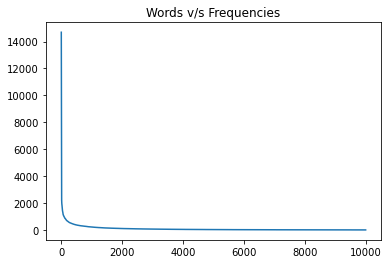

In [12]:
#Let us plot the frequencies against the words to see how words are distributed
plt.title('Words v/s Frequencies')

#Don't plot all 60000+ entries only plot a few first
low_lim=0
upper_lim=10000

#plt.figure(figsize=(20, 5))

plt.plot(np.arange(len(words))[low_lim:upper_lim],freq[low_lim:upper_lim])
plt.show()

### Observation:

Most of the words have very low frequency, these are of no use to us as they do not help in characterizing a document.

We will only pick a certain number of words from top to act as our features.

In [13]:
#Taking the first 6000 words seems good

#This number in choosen by seeing the graph, we can play with this number to see how performance fluctuates.
vocab=words[0:6000]
#This is your vocabulary


#We plan to store our data in a 2D array: the word will act as features and they will be identified by there position in the
#'voacb' list.

#The 'feature_indexes' dictionary will help us to efficiently look up the indexes of words in vacabulary
feature_indexes={}
for i in range(len(vocab)):
    feature_indexes[vocab[i]]=i



## Preparing data for training and testing


### Structure of input dataset (Both training and testing)

Have a 2d arrray where each row correspnds to a data point (a training text document).

Our features are our words.

For every (i,j) we will store the frequency of vocab[j] in the i-th training data point.

In [14]:
print("Number of training data points= ",len(train_paths))
print("Number of testing points = ",len(test_paths))
print("Number of features= ",len(vocab))

Number of training data points=  14997
Number of testing points =  5000
Number of features=  6000


In [15]:
#Prepare training set

#Initially we assume all frequencies are zero
X_train=np.zeros((len(train_paths),len(vocab)))
print("X_train's shape= ",X_train.shape)

i=0
for path in train_paths:
    #Open the file and start reading
    with open(path) as file_obj:
        
        #for a single document
        file_data=file_obj.readlines() 
        #reads every line as a string
        
        for line in file_data:
            #for every line in the document
            line=line.strip('\n')
            line=line.lower()
            words_in_line=line.split() 
            #splits the string with ' ' as delimeter
            
            for word in words_in_line:
                
                word=word.strip()
                if word in feature_indexes:
                    #if the current word is a word in vicabulary: we increase its frequency
                    X_train[i][feature_indexes[word]]+=1
    i+=1

X_train

X_train's shape=  (14997, 6000)


array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 2., ..., 0., 0., 0.]])

In [16]:
#Prepare testing set

#Initially we assume all frequencies are zero
X_test=np.zeros((len(test_paths),len(vocab)))
print("X_test's shape= ",X_test.shape)

i=0
for path in test_paths:
    #Open the file and start reading
    with open(path) as file_obj:
        
        #for a single document
        file_data=file_obj.readlines() #reads every line as a string
        
        for line in file_data:
            #for every line in the document
            line=line.strip('\n')
            line=line.lower()
            words_in_line=line.split() #splits the string with ' ' as delimeter
            
            for word in words_in_line:
                
                word=word.strip()
                if word in feature_indexes:
                    #if the current word is a word in vicabulary: we increase its frequency
                    X_test[i][feature_indexes[word]]+=1
    i+=1

X_test

X_test's shape=  (5000, 6000)


array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [17]:
#Get the training and testing labels
#Recall train_test_split

y_train=train_labels
y_test=test_labels


In [18]:
#Let us label encode the output labels

le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)
print(y_train)
print(y_test)


[ 1 15 17 ...  5 12  0]
[14  8  7 ...  7 14  7]


## Multinomial NB using SKlearn

#### Fitting with all 6000 words.

In [19]:
#Fitting with all 6000 words.

NB1=MultinomialNB()
NB1.fit(X_train,y_train)
y_test_pred1=NB1.predict(X_test)

print("Accuracy on testing data= ",accuracy_score(y_test,y_test_pred1))
print("Accuracy on training data= ",accuracy_score(y_train,NB1.predict(X_train)))
print("Classification report on testing data: ")
print(classification_report(y_test,y_test_pred1))

Accuracy on testing data=  0.8026
Accuracy on training data=  0.8649063145962526
Classification report on testing data: 
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       261
           1       0.64      0.74      0.69       248
           2       0.73      0.78      0.75       253
           3       0.69      0.67      0.68       260
           4       0.78      0.78      0.78       266
           5       0.86      0.74      0.80       265
           6       0.78      0.75      0.76       252
           7       0.83      0.87      0.85       223
           8       0.88      0.90      0.89       293
           9       0.94      0.96      0.95       245
          10       0.98      0.95      0.96       247
          11       0.90      0.91      0.91       248
          12       0.75      0.80      0.78       239
          13       0.91      0.85      0.88       236
          14       0.92      0.92      0.92       238
          15  

#### Fitting with only first 5000 words
#### X_train= X_train[:,:5000] all rows and the first 300 columns

In [22]:
NB2=MultinomialNB()
NB2.fit(X_train[:,:5000],y_train)
y_test_pred2=NB2.predict(X_test[:,:5000])

print("Accuracy on testing data= ",accuracy_score(y_test,y_test_pred2))
print("Accuracy on training data= ",accuracy_score(y_train,NB2.predict(X_train[:,:5000])))
print("Classification report on testing data: ")
print(classification_report(y_test,y_test_pred2))

Accuracy on testing data=  0.7914
Accuracy on training data=  0.8545042341801694
Classification report on testing data: 
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       261
           1       0.63      0.72      0.67       248
           2       0.71      0.77      0.74       253
           3       0.67      0.65      0.66       260
           4       0.78      0.76      0.77       266
           5       0.85      0.71      0.78       265
           6       0.75      0.75      0.75       252
           7       0.80      0.83      0.82       223
           8       0.86      0.90      0.88       293
           9       0.92      0.94      0.93       245
          10       0.97      0.94      0.96       247
          11       0.89      0.91      0.90       248
          12       0.75      0.77      0.76       239
          13       0.89      0.86      0.87       236
          14       0.92      0.91      0.91       238
          15  

Next let us try and increase the number of words.